In [83]:
#!/usr/bin/python2.6  
# -*- coding: utf-8 -*-  
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time
import cv2
import math

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


In [13]:
train_dir = "D:/data/tv/training/training"
valid_dir = "D:/data/tv/validation/validation"

dir1 = os.listdir(train_dir)

height = 128
width = 128
channels = 3
batch_size = 16
num_classes = 20

In [14]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    channel_shift_range=10,
    brightness_range=[0.1, 1],
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num)
print(valid_num)

Found 893 images belonging to 20 classes.
Found 56 images belonging to 20 classes.
893
56


In [15]:
model = keras.models.Sequential([

    keras.layers.Conv2D(filters=8, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=8, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [20]:
len(model.layers)

18

In [24]:
layer_outputs = [layer.output for layer in model.layers[:12]]

In [25]:
# 获取各层的名称：
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
print(layer_names)

['conv2d_10', 'conv2d_11', 'max_pooling2d_5', 'conv2d_12', 'conv2d_13', 'max_pooling2d_6', 'conv2d_14', 'conv2d_15', 'max_pooling2d_7', 'conv2d_16', 'conv2d_17', 'max_pooling2d_8', 'conv2d_18', 'conv2d_19', 'max_pooling2d_9']


In [26]:
log_dir = os.path.join("logs","cig")
print(log_dir)
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

logs\cig


In [27]:
# 定义TensorBoard对象.histogram_freq 如果设置为0，则不会计算直方图。
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_images=True)

In [28]:
epochs = 20
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size,
                              callbacks=[tensorboard_callback]
                             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 55 steps, validate for 3 steps
Epoch 1/20
55/55 [==============================] - 21s 374ms/step - loss: 2.7581 - accuracy: 0.1254 - val_loss: 2.1097 - val_accuracy: 0.3750
Epoch 2/20
55/55 [==============================] - 19s 341ms/step - loss: 1.8870 - accuracy: 0.3421 - val_loss: 1.9120 - val_accuracy: 0.3125
Epoch 3/20
55/55 [==============================] - 18s 334ms/step - loss: 1.4349 - accuracy: 0.4857 - val_loss: 1.3117 - val_accuracy: 0.5833
Epoch 4/20
55/55 [==============================] - 19s 338ms/step - loss: 1.1618 - accuracy: 0.5815 - val_loss: 1.1307 - val_accuracy: 0.5833
Epoch 5/20
55/55 [==============================] - 25s 450ms/step - loss: 0.9014 - accuracy: 0.6807 - val_loss: 0.8890 - val_accuracy: 0.7083
Epoch 6/20
55/55 [==============================] - 29s 531ms/step - loss: 0.6381 - accuracy: 0.7685 - val_loss: 0.8054 - val_accuracy: 0.7708
Epoch 7/20
55/55 [==============================] -

In [34]:
cig_image = cv2.imread("d:/note/cig.jpg")
cig_image = cv2.resize(cig_image,(128,128))

In [35]:
cig_image= np.expand_dims(cig_image,0)

In [73]:
layer_outputs = [layer.output for layer in model.layers[:12]]

In [75]:
model1 = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [76]:
activations = model1.predict(cig_image)

In [78]:
activations[0][0,:,:,0]

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
        10.967513 ],
       [45.98939  , 33.621468 , 38.459442 , ..., 50.39444  , 50.46083  ,
        67.01939  ],
       [69.30615  , 41.061295 , 37.632725 , ..., 39.12774  , 33.79388  ,
        56.23176  ],
       ...,
       [21.558546 ,  8.392546 , 10.642942 , ...,  9.069396 , 36.878555 ,
        10.9718075],
       [20.926874 ,  9.543249 , 11.407661 , ..., 23.11456  , 62.00627  ,
        16.17233  ],
       [36.202263 , 52.201523 , 53.238598 , ..., 84.186226 , 89.3195   ,
        55.12331  ]], dtype=float32)

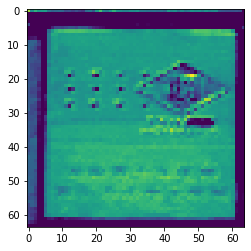

In [81]:
plt.imshow(activations[2][0,:,:,0])

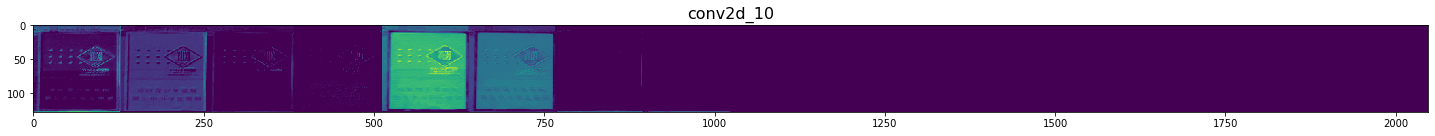

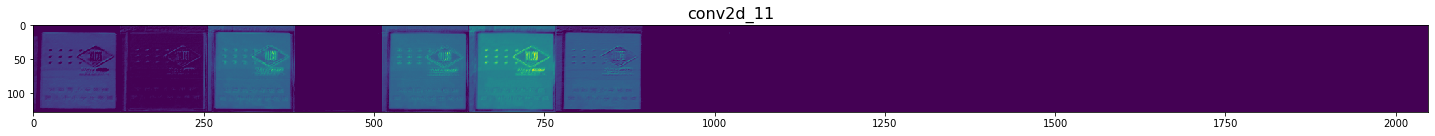

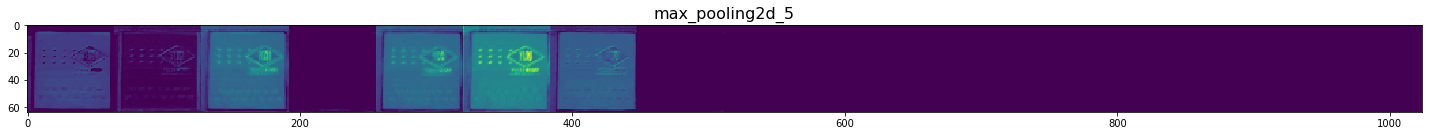

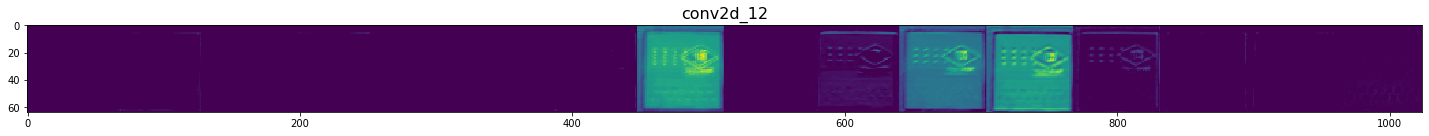

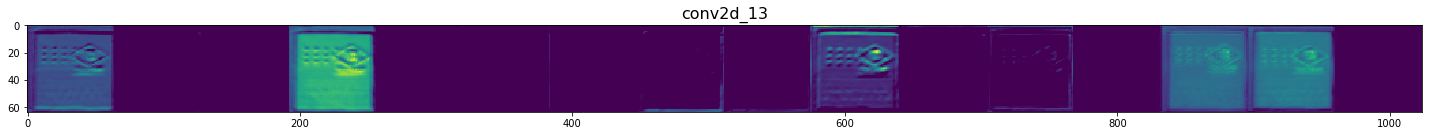

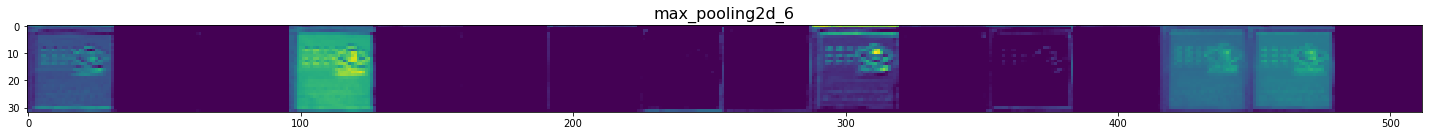

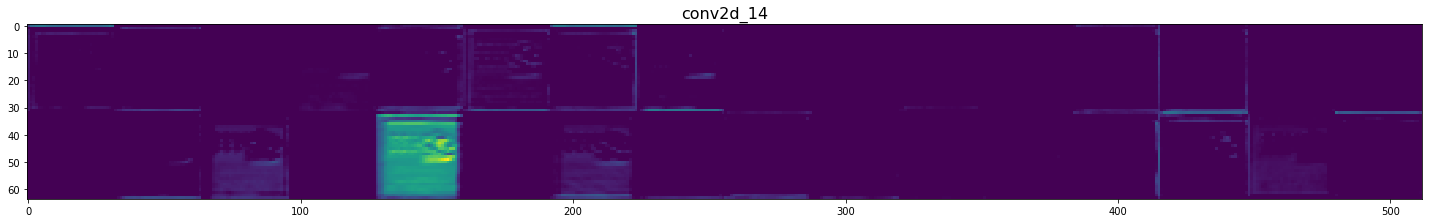

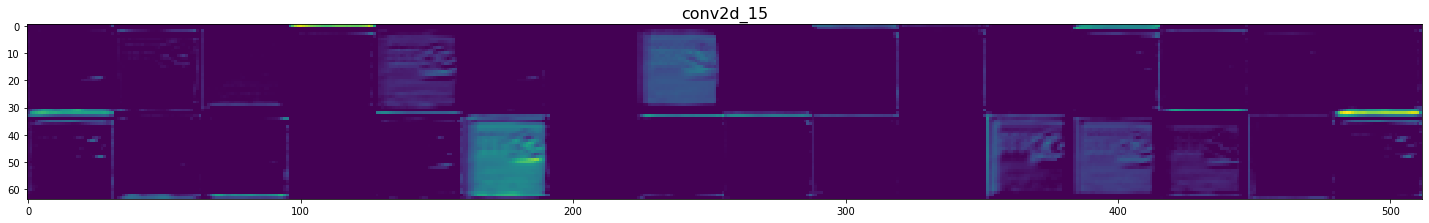

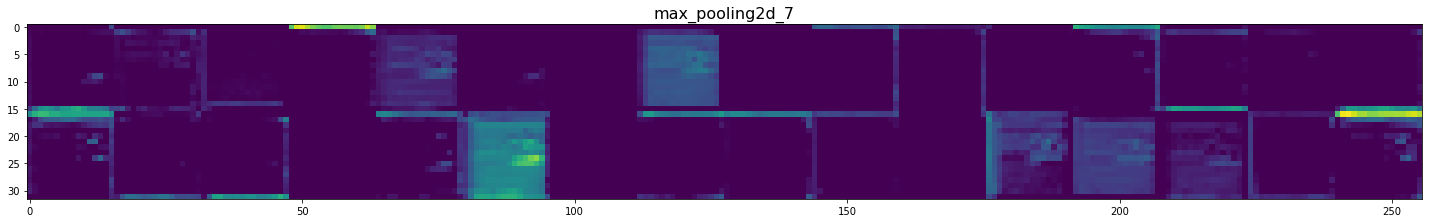

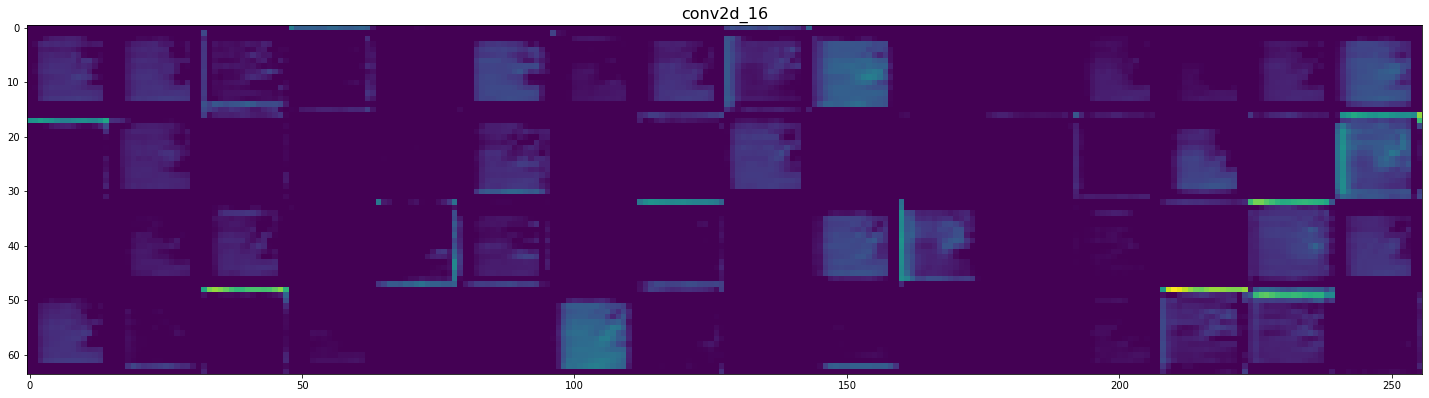

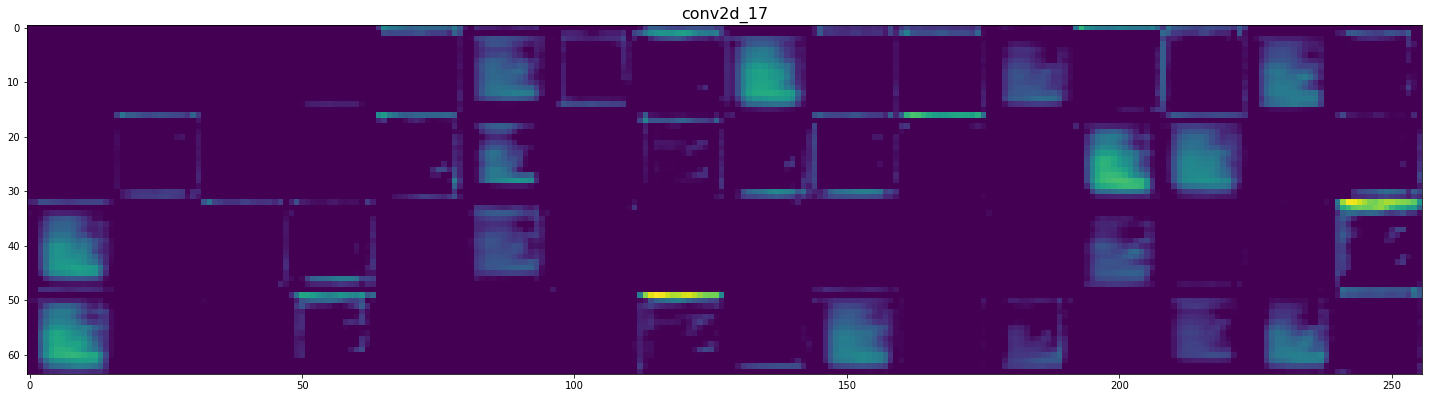

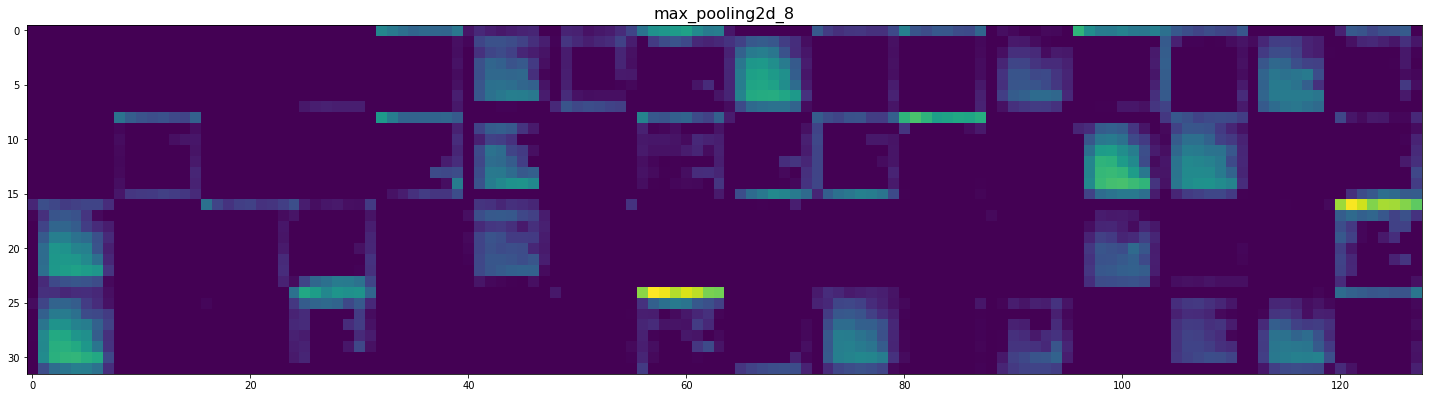

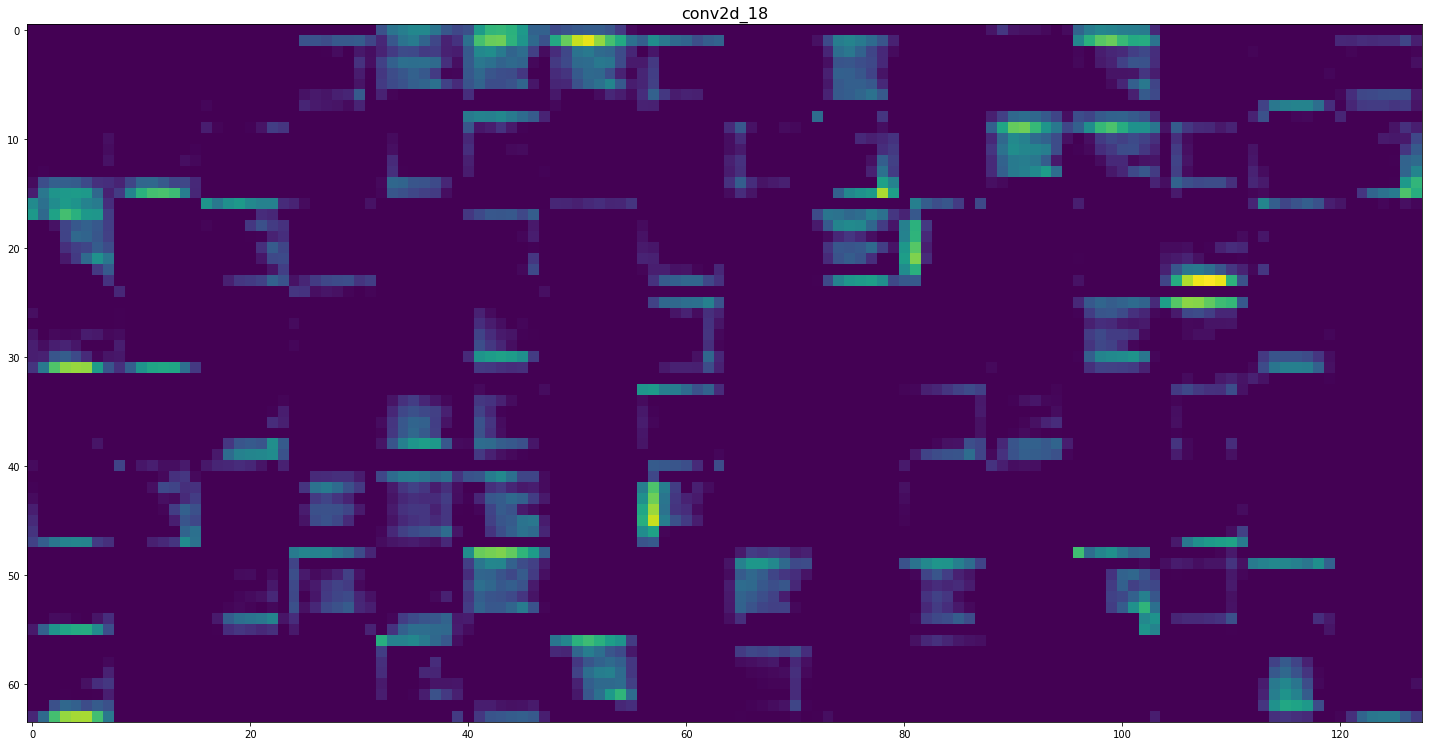

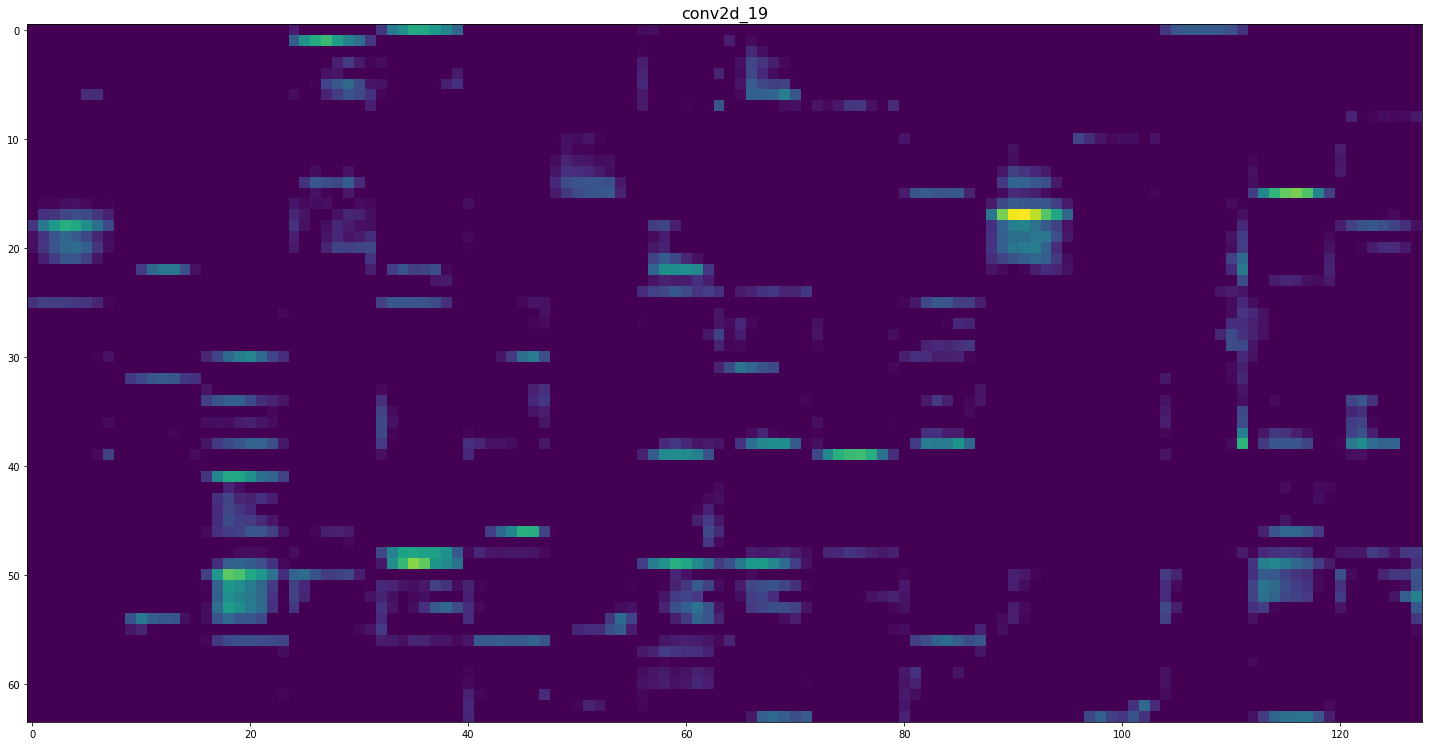

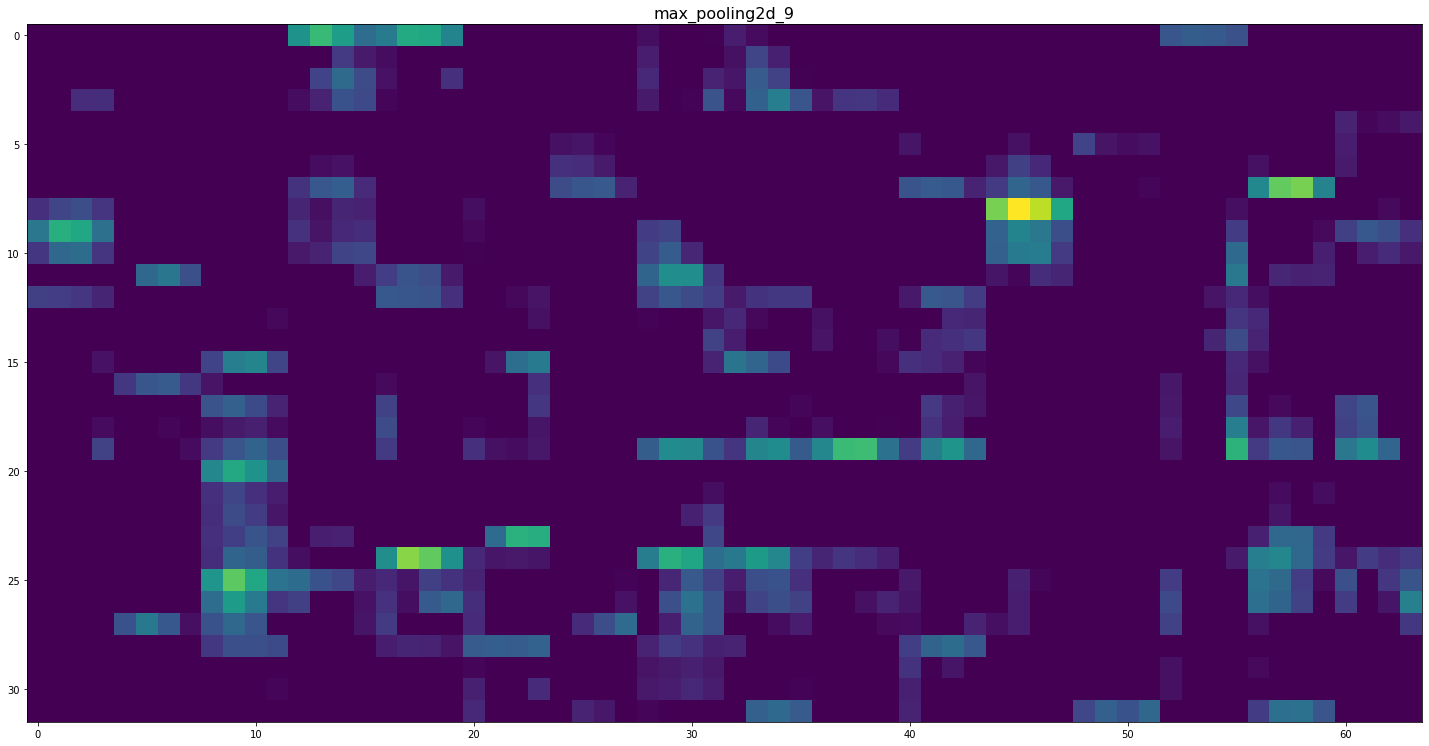

In [84]:
for activation,layer_name in zip(activations,layer_names):
    h = activation.shape[1]
    w = activation.shape[2]
    num_channels = activation.shape[3]
    cols = 16
    rows = math.ceil(num_channels/cols)
    img_grid = np.zeros((h*rows,w*cols))

    for c in range(num_channels):
        f_r = math.ceil((c+1)/cols)
        f_c = (c+1)if f_r==1 else (c+1-(f_r-1)*cols)
        img_grid[(f_r-1)*h:f_r*h,(f_c-1)*w:f_c*w ] = activation[0,:,:,c]


    plt.figure(figsize=(25,25))
    plt.imshow(img_grid, aspect='equal',cmap='viridis')
    plt.grid(False)
    plt.title(layer_name,fontsize=16)
plt.show()